¿Es Australia es el sitio más peligroso y letal para estar relajada en la playa?

¿Cuál es el rango de edad que sufre la mayoría de los ataques?

Independientemente de la edad, sufren los hombres más ataques que las mujeres?

¿En qué mes ocurren más ataques?

¿Cuál es la relación entre la especie y el tipo de ataque (si es fatal o no)?

¿Cómo han evolucionado los ataques a lo largo del tiempo?

Por lo tanto, en este ejercicio tendremos que limpiar los outliers.

1 ¿Sobre qué columnas podremos eliminar o reemplazar los outliers?

2 Identifica visualmente los outliers

3 Identifica sobre el dataframe las filas que son outliers

4 Reemplaza los outliers por el estadístico más correcto.

5 Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente pair programming de limpieza

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [6]:
pd.options.display.max_columns = None

In [7]:
df = pd.read_csv("../../datos/attack_limpio.csv", index_col = 0)
df.head(2)

,Unnamed: 0.1,case_number,year,type,country,area,location,activity,name,age,time,species_,href,injury,date,mes,fatal_,sex2,species_tipo,edad
0,0,1800.00.00,1800.0,Unprovoked,SEYCHELLES,St. Anne,NaN,a corsair's boat was overturned,NaN,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,"FATAL, all onboard were killed by sharks",1800,NaN,y,F,NaN,NaN
1,1,1797.05.28.R,1797.0,Unprovoked,NaN,NaN,NaN,Dropped overboard,child,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,FATAL,Reported May-28-1797,May,y,NaN,NaN,NaN


1 ¿Sobre qué columnas podremos eliminar o reemplazar los outliers?

In [9]:
#Sobre la columna "year", "edad" ya que son variables numéricas y los outliers solo se pueden trabajar sobre este tipo de variables.
outliers = df.select_dtypes(include = np.number)

In [10]:
outliers.columns

Index(['Unnamed: 0.1', 'year', 'edad'], dtype='object')

In [ ]:
df.head(2)

,case_number,year,type,country,area,location,activity,name,age,time,species_,href,injury,date,mes,fatal_,sex2,species_tipo,edad
0,1800.00.00,1800.0,Unprovoked,SEYCHELLES,St. Anne,NaN,a corsair's boat was overturned,NaN,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,"FATAL, all onboard were killed by sharks",1800,NaN,y,F,NaN,NaN
1,1797.05.28.R,1797.0,Unprovoked,NaN,NaN,NaN,Dropped overboard,child,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,FATAL,Reported May-28-1797,May,y,NaN,NaN,NaN


2 Identifica visualmente los outliers

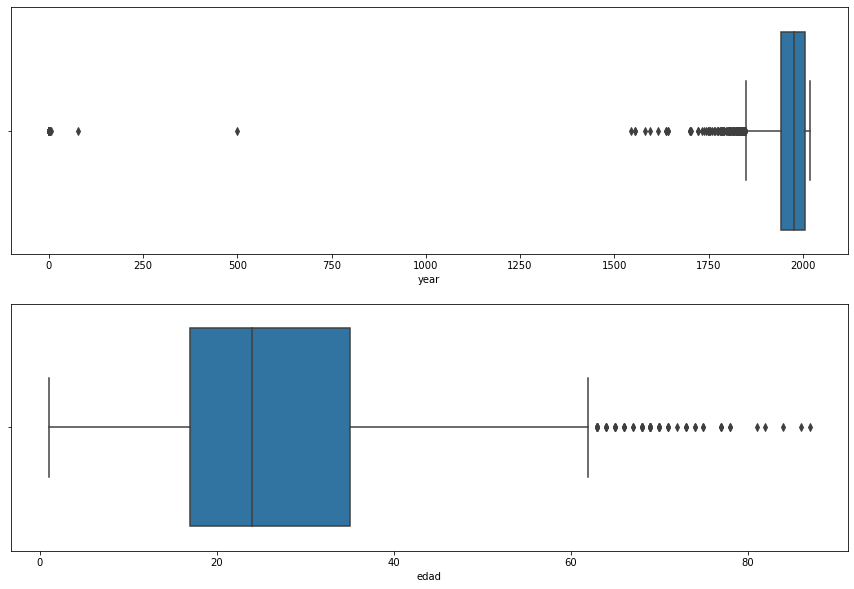

In [ ]:
#Lo haremos generando un boxplot para su mejor visualización

plt.rcParams['figure.figsize']= (15,10)

fig, axes = plt.subplots(len(outliers.columns),1)

for i in range(len(outliers.columns)):
    sns.boxplot(x= df[outliers.columns[i]], data= df, ax= axes[i]);
    
plt.show()

3 Identifica sobre el dataframe las filas que son outliers

In [31]:
#Creamos función para poder aplicarlo en las columnas independientemente de su número
def calcular_outliers (df,nombre_columna):
    
    Q1_outliers = np.nanpercentile (df[nombre_columna], 25)
    Q3_outliers = np.nanpercentile (df[nombre_columna], 75)

    IQR = Q3_outliers - Q1_outliers
    outlier_step = 1.5*IQR
    
    outliers = df[(df[nombre_columna]< Q1_outliers - outlier_step) | (df[nombre_columna]> Q3_outliers + outlier_step)]
    if outliers.shape[0] > 0:

        dicc_indices[col] = (list(outliers.index)) 

    return dicc_indices

4 Reemplaza los outliers por el estadístico más correcto.

In [32]:
# Comprobamos los principales estadísticos y vemos los outliers, columnas numericas ("year", "edad")

outliers.describe()

,Unnamed: 0.1,year,edad
count,6328.000000,6328.000000,3455.000000
mean,3144.012800,1927.133059,27.275832
std,1811.674049,281.554598,13.879811
min,0.000000,0.000000,1.000000
25%,1578.750000,1942.000000,17.000000
50%,3148.500000,1976.000000,24.000000
75%,4708.250000,2005.000000,35.000000
max,6283.000000,2018.000000,87.000000


In [33]:
# Reemplazamos los outliers por la mediana

def reemplazar_outliers (df,nombre_columna):

    for index in (df,[nombre_columna]):
        df.replace(df.loc[index, 'nombre_columna'], df['nombre_columna'].median(), inplace = True)
    return reemplazar_outliers

In [34]:
def reemplazar_outliers (df,year):

    for index in (df,[year]):
        df.replace(df.loc[index, 'year'], df['year'].median(), inplace = True)
    return reemplazar_outliers

In [37]:
df["year"].unique()

array([1800., 1797., 1792., 1791., 1788., 1787., 1786., 1785., 1784.,
       1783., 1780., 1779., 1776., 1771., 1767., 1764., 1758., 1753.,
       1751., 1749., 1755., 1748., 1742., 1738., 1733., 1723., 1721.,
       1703., 1700., 1642., 1638., 1637., 1617., 1595., 1580., 1555.,
       1554., 1543.,  500.,   77.,    5.,    0., 2018., 2017., 2016.,
       2015., 2014., 2013., 2012., 2011., 2010., 2009., 2008., 2007.,
       2006., 2005., 2004., 2003., 2002., 2001., 2000., 1999., 1998.,
       1997., 1996., 1995., 1984., 1994., 1993., 1992., 1991., 1990.,
       1989., 1969., 1988., 1987., 1986., 1985., 1983., 1982., 1981.,
       1980., 1979., 1978., 1977., 1976., 1975., 1974., 1973., 1972.,
       1971., 1970., 1968., 1967., 1966., 1965., 1964., 1963., 1962.,
       1961., 1960., 1959., 1958., 1957., 1956., 1955., 1954., 1953.,
       1952., 1951., 1950., 1949., 1948., 1848., 1947., 1946., 1945.,
       1944., 1943., 1942., 1941., 1940., 1939., 1938., 1937., 1936.,
       1935., 1934.,

In [39]:
def reemplazar_outliers (df,edad):

    for index in (df,[edad]):
        df.replace(df.loc[index, 'edad'], df['edad'].median(), inplace = True)
    return reemplazar_outliers

In [40]:
# NO SE POR QUÉ ME SALE TODAVÍA UN NAN

df["edad"].unique()

array([nan, 14., 19., 20., 15., 21., 27., 36., 25.,  6., 16., 50., 13.,
       57., 11., 48., 18., 52., 12., 32., 10., 34., 30., 60., 33., 29.,
       54., 41., 37., 56., 69., 38., 55., 35., 46., 45., 28., 24., 26.,
       49., 22.,  7., 31., 17., 40., 42.,  3.,  8., 82., 73., 68., 51.,
       39., 58., 47., 61., 65., 66., 43.,  9., 72., 59., 64., 23., 71.,
       44., 62., 63., 70., 53., 77., 74.,  5., 86., 84., 75., 87., 67.,
        1.,  2., 81., 78.])

In [47]:
df.drop(["Unnamed: 0.1"], axis = 1)
df.head(2)

,Unnamed: 0.1,case_number,year,type,country,area,location,activity,name,age,time,species_,href,injury,date,mes,fatal_,sex2,species_tipo,edad
6284,6240,1831.01.22.R,1831.0,Invalid,AUSTRALIA,Tasmania,Hobart,"Boat capsized, clinging to line",Robert Dudlow,NaN,NaN,Invalid,http://sharkattackfile.net/spreadsheets/pdf_di...,"Drowned, no shark involvement",Reported 22- Jan-1831,Jan,NaN,M,NaN,NaN
6285,6241,1830.07.26,1830.0,Unprovoked,USA,Massachusetts,"Swampscott, Essex County","Fishing from dory, shark upset boat & he fell ...",Joseph Blaney,52,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,FATAL,26-Jul-1830,Jul,y,M,NaN,52.0


5 Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente pair programming de limpieza

In [ ]:
df.to_csv("../../datos/attack_nulos.csv")